# **Supervised Learning**

## Cancer prediction
![alt text](https://d3b6u46udi9ohd.cloudfront.net/wp-content/uploads/2022/03/21075108/Types-of-blood-cancer_11zon.jpg "Cancer")

## **Introduction**

### **About Dataset**

The dataset used in this project was obtained from the [Kaggle's Cancer Data Page](https://www.kaggle.com/datasets/erdemtaha/cancer-data). It contains 569 instances of cancer biopsies, each with 32 attributes. One of the attributes is the diagnosis, which can be either benign or malignant. The other 30 attributes are numeric-valued laboratory measurements, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension. The remaining attribute represents the ID number of the instance.

### **About the Problem**

The goal of this project is to predict whether a cancer biopsy is benign or malignant, based on the 30 attributes mentioned above. This is a binary classification problem, where the target variable is the diagnosis, which can be either benign or malignant.

### **About the Solution**

The solution to this problem is a supervised learning model, which will be trained using the dataset mentioned above. The model will be trained using the training set, and then evaluated using the test set. The model will be evaluated using the accuracy metric, which is the percentage of correct predictions made by the model.

---

This project was made possible by:

| Name | Email |
|-|-|
| Diogo Costa | up202007770@edu.fe.up.pt |
| Fábio Sá | up202007658@edu.fe.up.pt |
| João Araújo | up202004293@edu.fe.up.pt |
|---|---|
| Group | T05 - G01 |

### Importing libraries

We firstly need to install the libraries we will use in this project.

To do so, run the following command in the terminal (make sure you are in the project's root directory):

```bash
pip install -r requirements.txt
```

Then, we can import the libraries we will use in this project.

We also disable the warnings, to make the notebook cleaner.

In [2]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
from imblearn.under_sampling import AllKNN
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from pycaret.classification import *


warnings.filterwarnings('ignore')

### Create a dataframe with the dataset from the csv file

In [3]:
df = pd.read_csv('../data/Cancer_Data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data preprocessing

### Pre analysis

This should be done before any data manipulation, to get a better understanding of the data and filter out any outliers.

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Check missing values
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

### Filtering out outliers

From this first analysis, we can notice that the column `id` is not useful for our analysis, so we can drop them. We need to also drop out the column `Unnamed: 32`, since it is full of null values. All other values ​​were uniform and with the same order of magnitude.

In [6]:
# dropping columns, id doesn't have any significance and Unnamed: 32 has all null values
df = df.drop(["id","Unnamed: 32"],axis = 'columns')

df.shape

(569, 31)

### Encode the target variable

We need to encode the target variable, so that we can use it in our models, since it is currently object type. The remaining columns are already numeric, so we don't need to encode them.

In [7]:
encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Analysis

We can now analyze the data, to get a better understanding of it.
We will compare how the different features are distributed, based on the diagnosis.

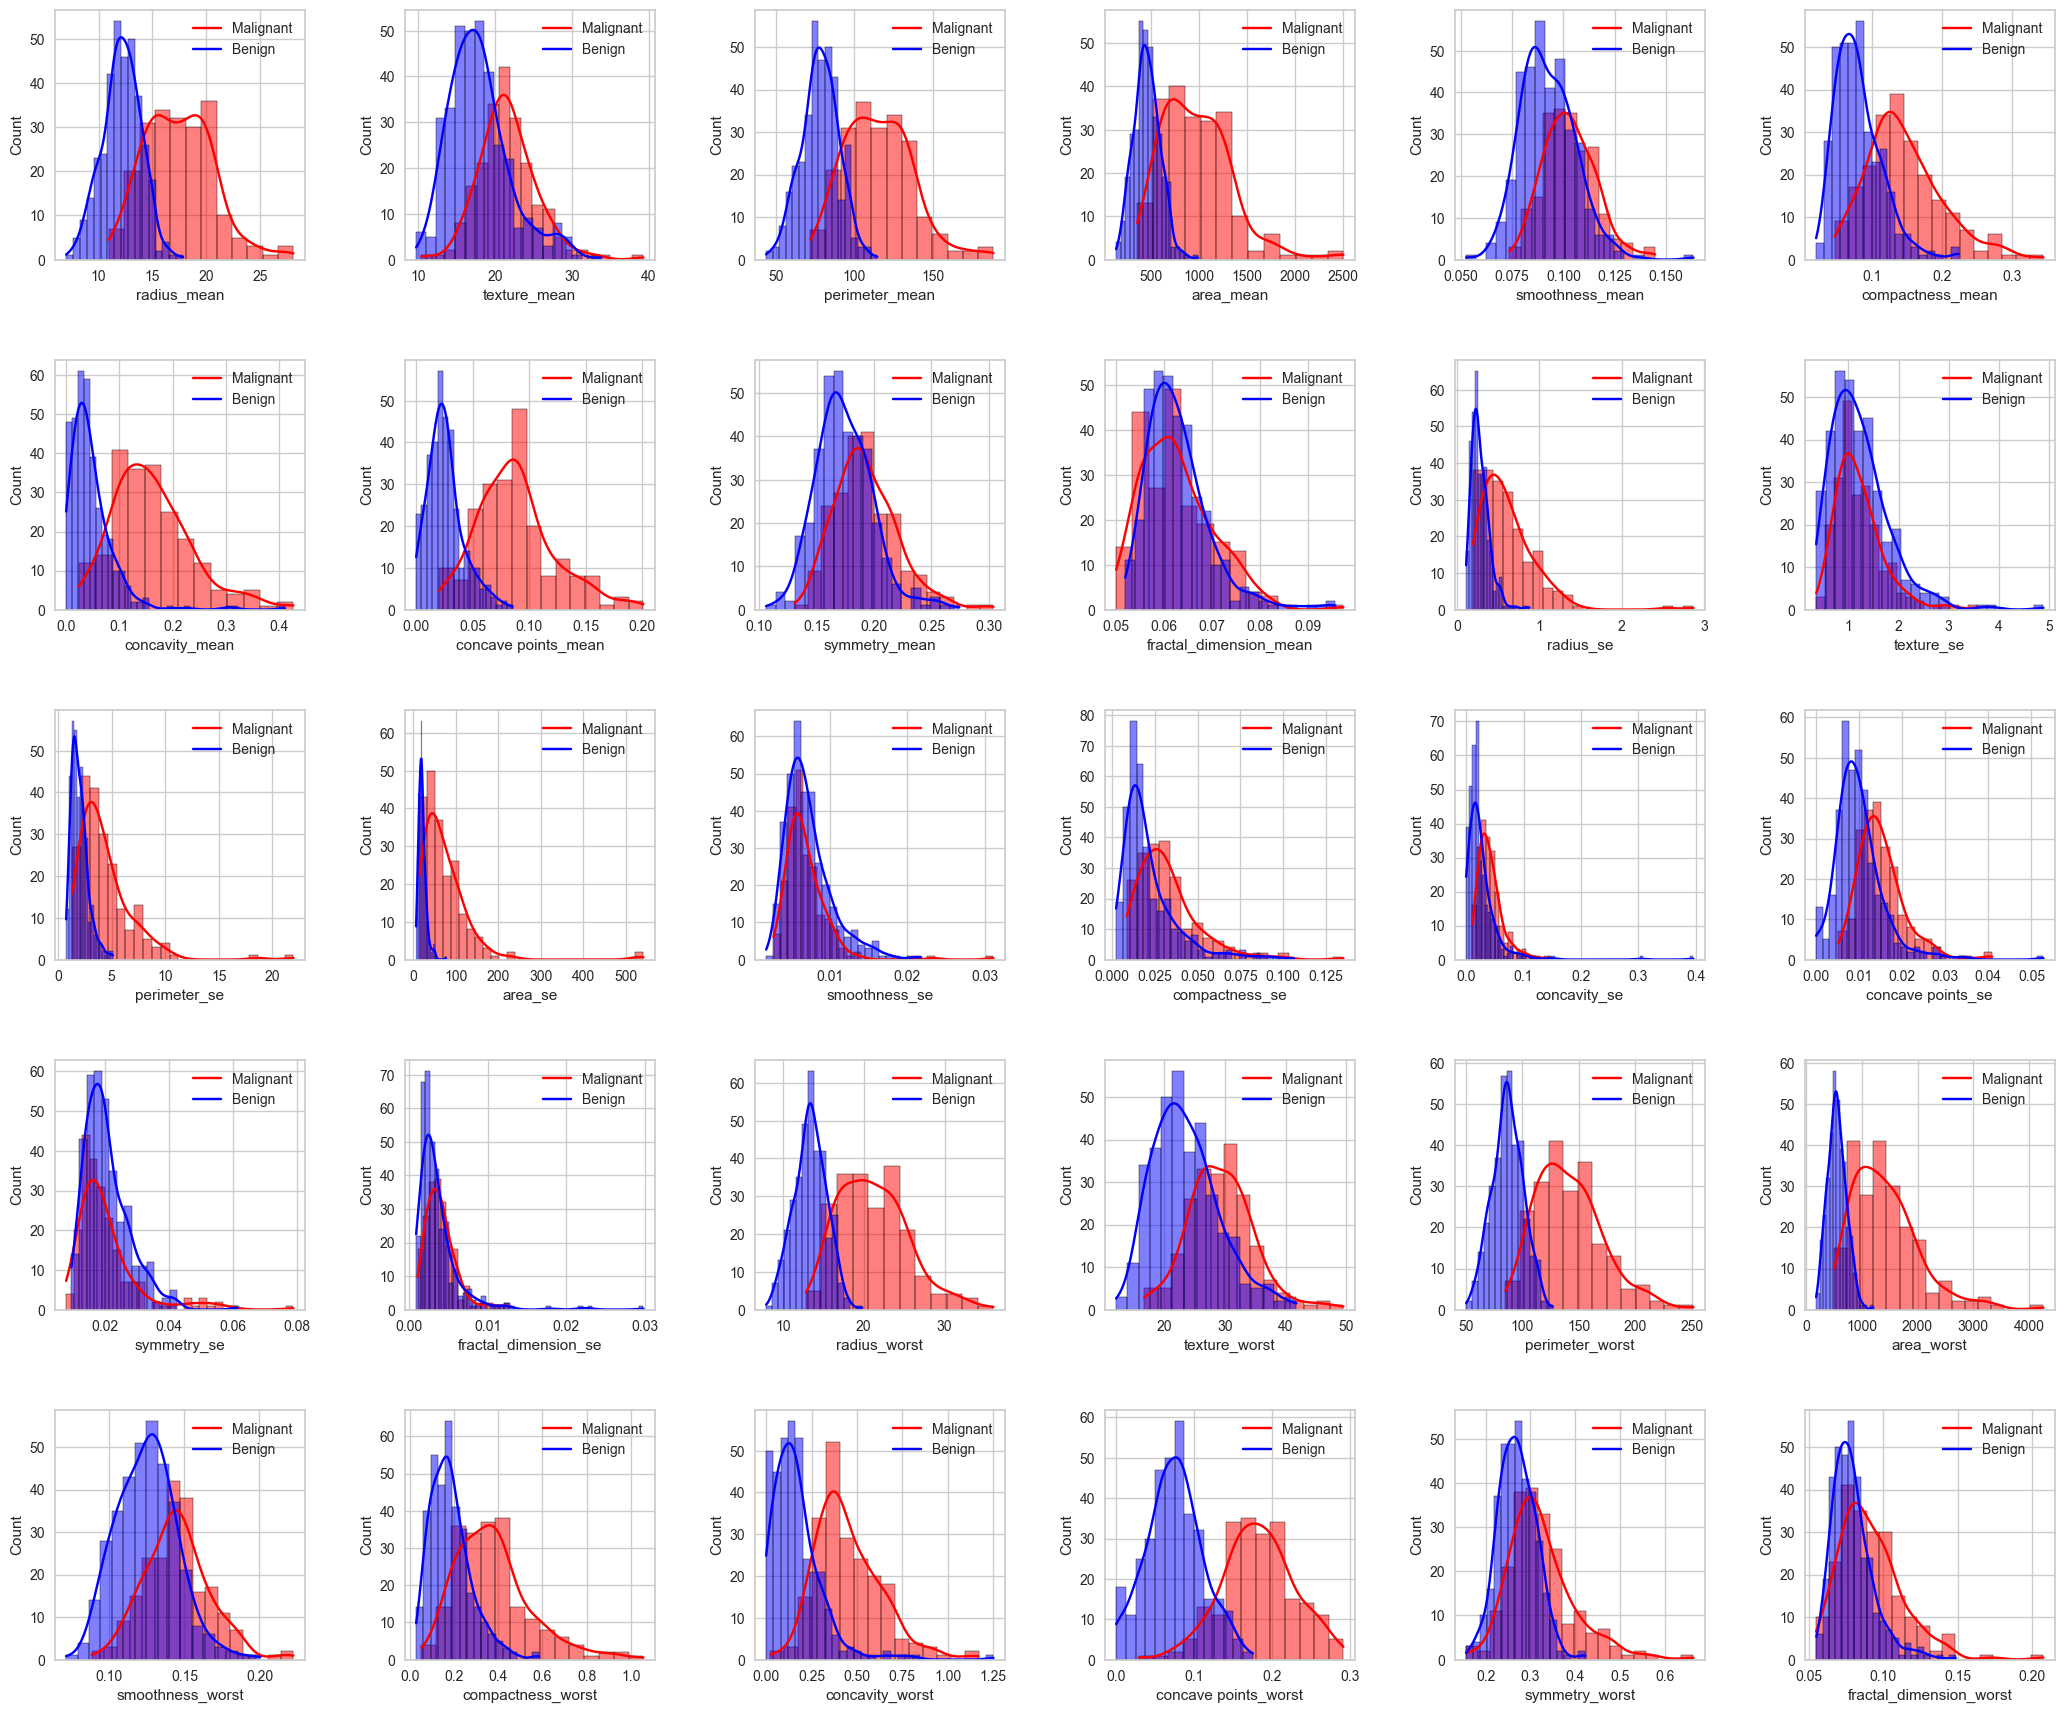

In [8]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

df1 = df[df['diagnosis']==1].drop(['diagnosis'],axis=1)
df2 = df[df['diagnosis']==0].drop(['diagnosis'],axis=1)

cols = list(df1.columns)

for i, col in enumerate(cols):
    plt.subplot(6,6,i+1)
    sb.histplot(data=df1[col], color='red', label = 'Malignant', kde=True)
    sb.histplot(data=df2[col], color='blue', label = 'Benign', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()

Also, we will plot the correlation matrix, to see how the features are correlated with the diagnosis numerically.

<Axes: >

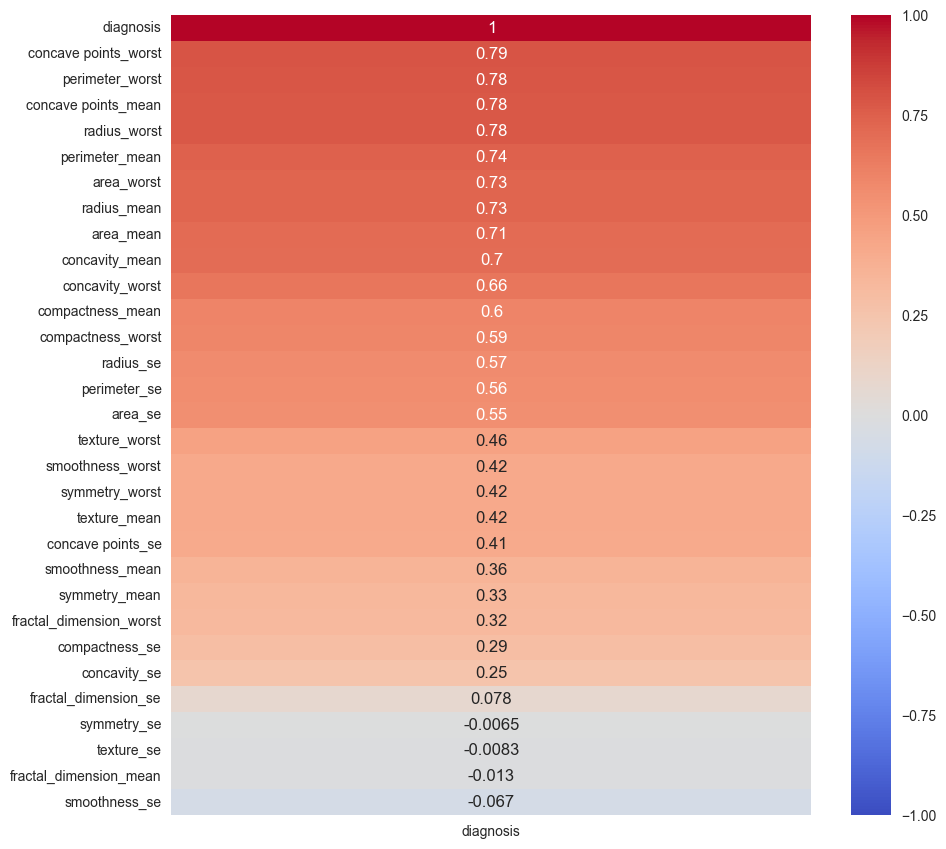

In [9]:
cols = list(df1.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

From this analysis, we can see that there is a big portion of the features that are correlated with the diagnosis, which is good for our models.

# Feature extraction

We need to find correlations between the features themselfs. We will do this by plotting the correlation matrix, only of those features that have over 95% correlation between each other.

This way, we can reduce the number of features, while still keeping (mostly) the same amount of information.

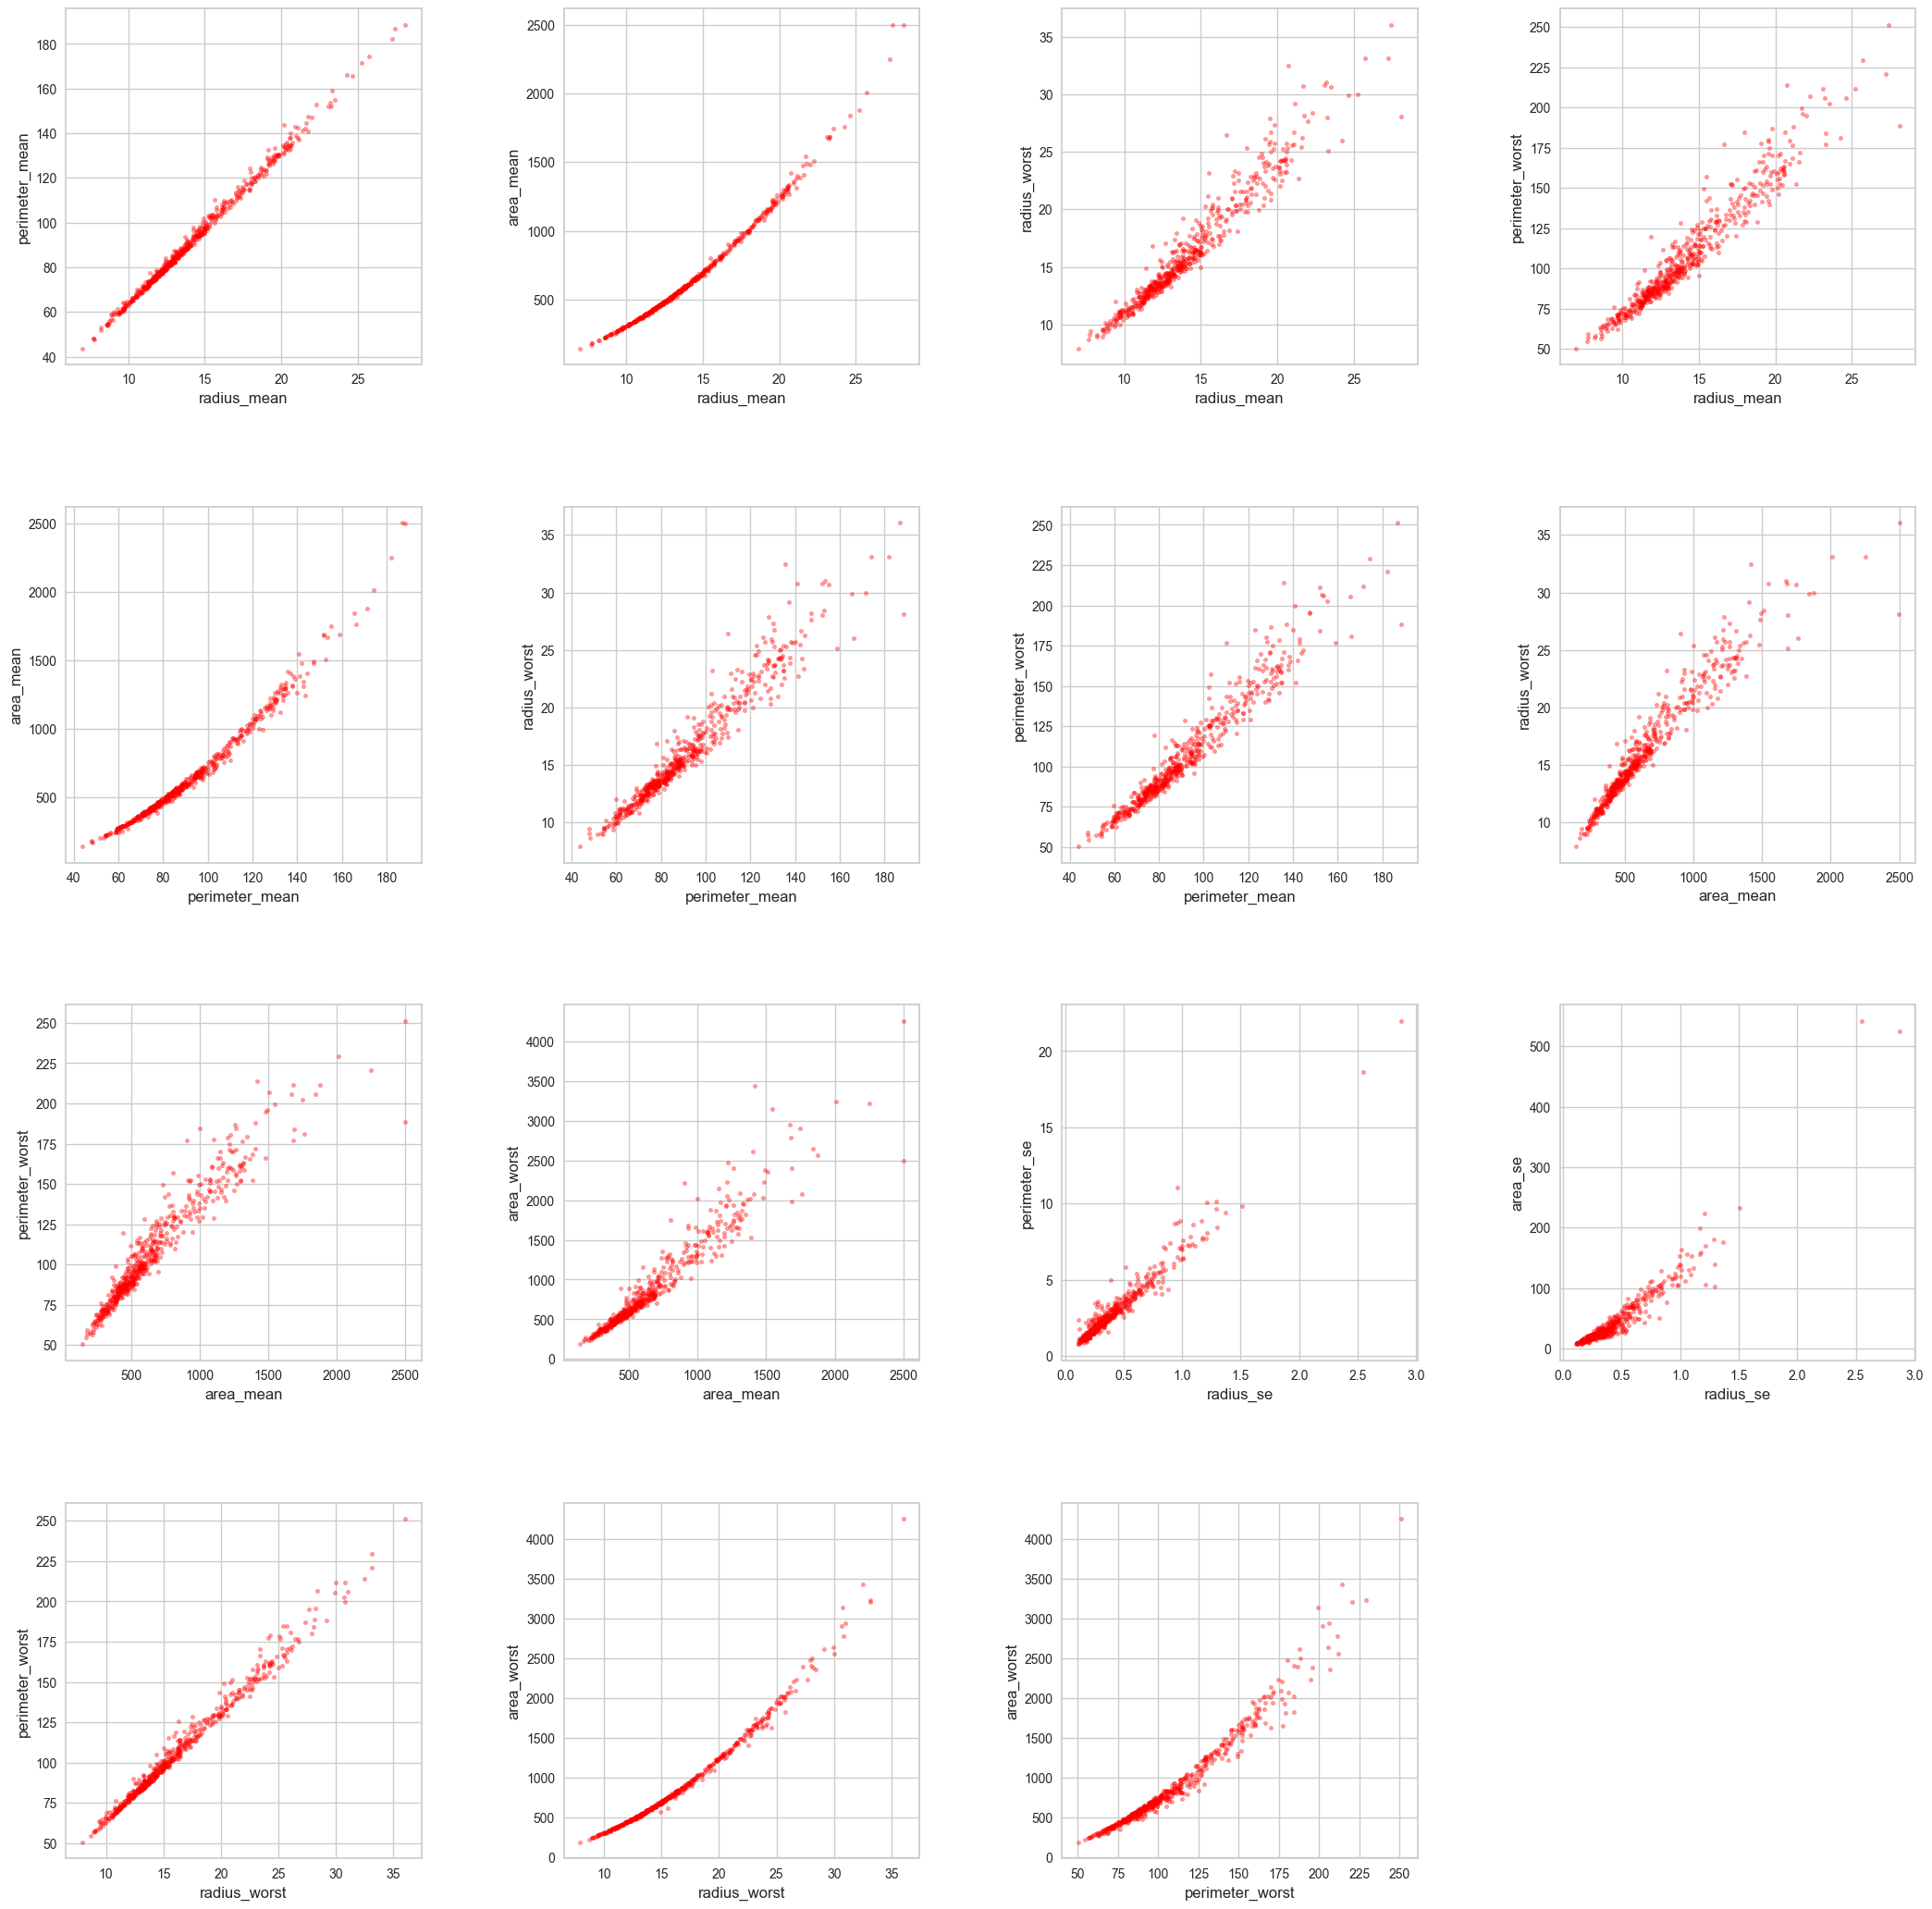

In [10]:
cols = list(df.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'diagnosis':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'diagnosis':
            continue
        if math.fabs(df[col1].corr(df[col2])) > 0.95:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

### Extract the features with the highest correlation into the new dataframe

From this, we will reduce the number of features from 30 to 28

In [11]:
df_extracted = df.copy()

df_extracted['p_mean/r_mean'] = df_extracted['perimeter_mean']/df_extracted['radius_mean']
df_extracted['p_worst/r_mean'] = df_extracted['perimeter_worst']/df_extracted['radius_mean']
df_extracted['a_mean/r_mean'] = df_extracted['area_mean']/df_extracted['radius_mean']
df_extracted['r_worst/r_mean'] = df_extracted['radius_worst']/df_extracted['radius_mean']
df_extracted['p_se/r_se'] = df_extracted['perimeter_se']/df_extracted['radius_se']

# Remove the old columns after doing feature extraction

cols_extracted_drop = ['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst', 'perimeter_se', 'radius_se']

df_extracted = df_extracted.drop(cols_extracted_drop, axis='columns')

df_extracted.sample(3)


,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,p_mean/r_mean,p_worst/r_mean,a_mean/r_mean,r_worst/r_mean,p_se/r_se
115,0,21.53,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,0.9227,24.79,...,0.23990,0.15030,0.07247,0.2438,0.08541,6.414920,7.337804,36.764459,1.145851,6.414368
538,0,25.49,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,1.4620,19.14,...,0.08340,0.00000,0.00000,0.3058,0.09938,6.207789,7.396817,23.133652,1.174408,6.597829
50,0,21.60,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,1.2100,28.47,...,0.08615,0.05523,0.03715,0.2433,0.06563,6.353741,7.056122,36.386054,1.103741,6.486952


After this, we can verify that there are far less features highly correlated between themselfs.

In [12]:
cols = list(df_extracted.columns)

feature_cols = 0

for i, col1 in enumerate(cols):
    for col2 in cols[i::]:
        if col1 == col2:
            continue
        if math.fabs(df_extracted[col1].corr(df_extracted[col2])) > 0.95:
            feature_cols += 1
            
print(f'Found {feature_cols} highly correlated features!')


Found 0 highly correlated features!


Then, we will plot the correlation matrix again, to see how the features are correlated with the diagnosis numerically.

<Axes: >

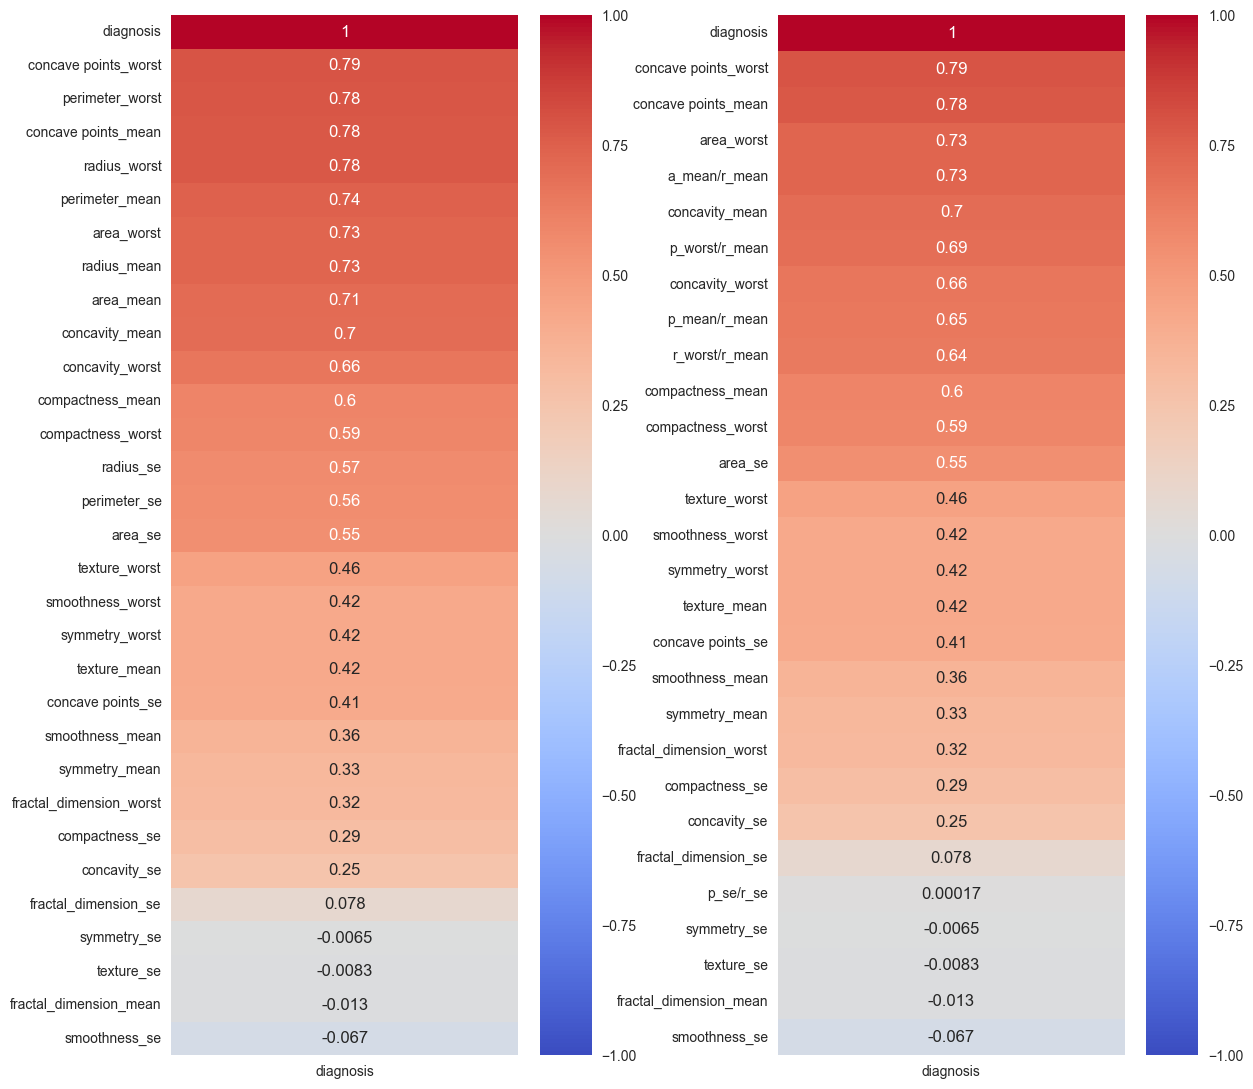

In [13]:
cols = list(df1.columns)

plt.figure(figsize=(13,13))
plt.subplot(1,2,1)

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.subplot(1,2,2)

corr = df_extracted.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Prepare the dataframe for model training

In [14]:
features = df_extracted.drop(['diagnosis'],axis=1)
labels = df['diagnosis']

np.unique(labels, return_counts=True)

(array([0, 1]), array([357, 212], dtype=int64))

### Split the dataset into train and test sets

Since the dataset is quite unbalanced (357 benign and 212 malignant) and we have few cases to train the models, we will be over sampling it, to make sure that the train set has the same proportion of benign and malignant instances.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)
X_train, y_train = SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [16]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.5
 1    0.5
 Name: diagnosis, dtype: float64,
 0    0.640351
 1    0.359649
 Name: diagnosis, dtype: float64)

## Model training

We will run the models with the default parameters, using the PyCarets `setup` function, following by the `compare_models()`. Then, we will plot their results for easier comparison.

In [17]:
from pycaret.classification import *

classification = setup(data = df_extracted, train_size=0.8, target = 'diagnosis', session_id=42, normalize=True, transformation=True)

best = compare_models()

results = pull()
results

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:39:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9757,0.9931,0.9529,0.9830,0.9670,0.9478,0.9489,0.196
xgboost,Extreme Gradient Boosting,0.9714,0.9931,0.9471,0.9761,0.9611,0.9385,0.9390,0.131
lightgbm,Light Gradient Boosting Machine,0.9713,0.9902,0.9471,0.9765,0.9611,0.9384,0.9391,0.125
rf,Random Forest Classifier,0.9691,0.9925,0.9471,0.9701,0.9581,0.9336,0.9342,0.137
lr,Logistic Regression,0.9670,0.9925,0.9412,0.9716,0.9549,0.9289,0.9307,0.523
et,Extra Trees Classifier,0.9670,0.9933,0.9294,0.9808,0.9538,0.9282,0.9297,0.140
gbc,Gradient Boosting Classifier,0.9646,0.9914,0.9412,0.9660,0.9525,0.9244,0.9256,0.126
ridge,Ridge Classifier,0.9626,0.0000,0.9176,0.9823,0.9471,0.9183,0.9215,0.111
knn,K Neighbors Classifier,0.9625,0.9856,0.9235,0.9757,0.9481,0.9188,0.9206,0.204
lda,Linear Discriminant Analysis,0.9603,0.9878,0.9059,0.9879,0.9437,0.9133,0.9168,0.116


Since PyCaret doesn't support some models we want to try (such as the `ExtraTreesClassifier` model), we will run it separately. We will also the best performers from the previous step, to see if the new additions can improve the results.

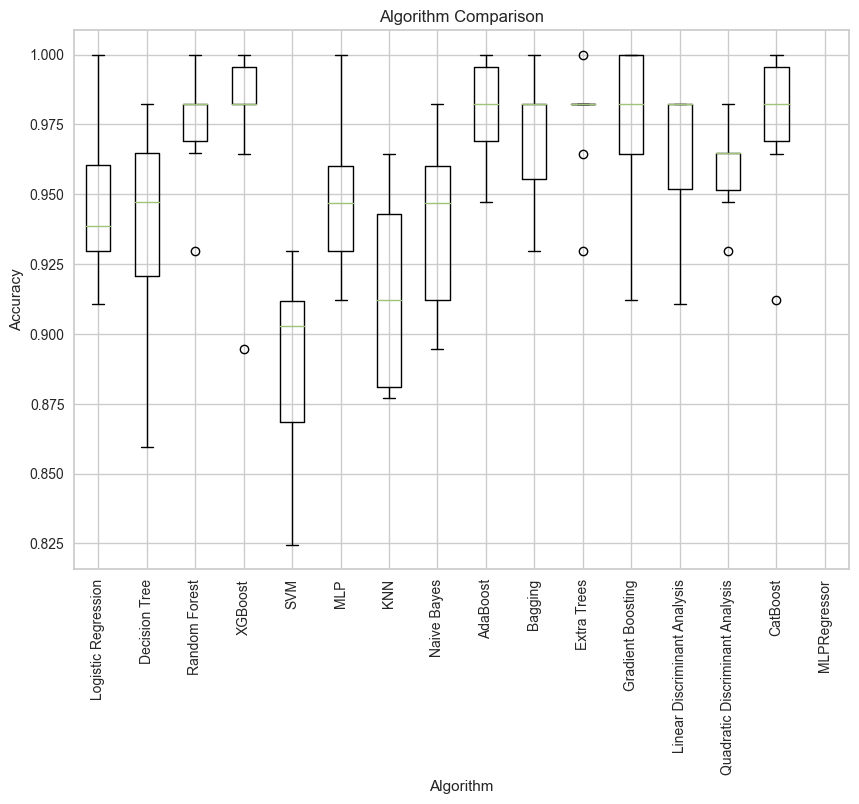

In [18]:
def compare_models2():
    models = []
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('Random Forest', RandomForestClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('SVM', SVC()))
    models.append(('MLP', MLPClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Naive Bayes', GaussianNB()))
    models.append(('AdaBoost', AdaBoostClassifier()))
    models.append(('Bagging', BaggingClassifier()))
    models.append(('Extra Trees', ExtraTreesClassifier()))
    models.append(('Gradient Boosting', GradientBoostingClassifier()))
    models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
    models.append(('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()))
    models.append(('CatBoost', CatBoostClassifier(logging_level='Silent')))
    models.append(('MLPRegressor', MLPRegressor()))
    
    results = []
    names = []
    scoring = 'accuracy'
    
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
    plt.figure(figsize=(10,7))
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')

    # swap the axes
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)

    plt.show()

compare_models2()

### Select the best model

From the previous analysis, we can see that the best model is the `CatBoost Classifier`, since it has the highest accuracy.

Let's train the model with out parameters, and plot the confusion matrix.

In [24]:
model = CatBoostClassifier(logging_level='Silent', random_state=42)
model.fit(X_train, y_train)

In [25]:
model.score(X_train, y_train)

1.0

In [26]:
model.score(X_test, y_test)

0.9912280701754386

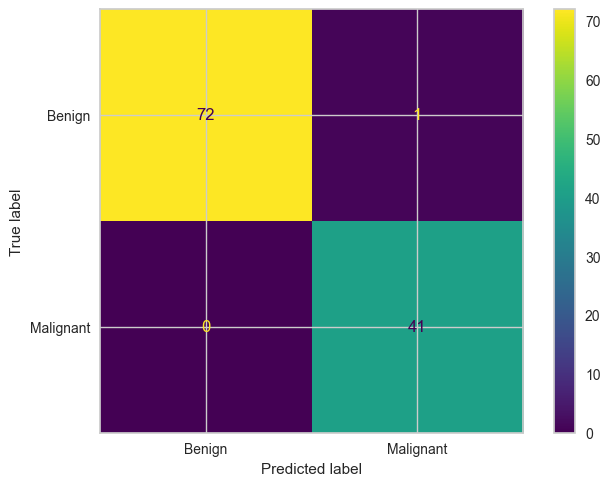

In [27]:
y_predicted = model.predict(X_test)
confusion_matrix_res = confusion_matrix(y_test, y_predicted)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_res, display_labels = ["Benign", "Malignant",]).plot()
plt.show()